# Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

## Data Overview

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# size of the data
data.shape


(891, 10)

In [48]:
#features of data
data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2',
       '3'],
      dtype='object')

In [49]:
#statistical summary
data.describe(include ='all')

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783,0.206510,0.551066
std,0.486592,13.002015,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876,0.405028,0.497665
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


## checking missing values

In [7]:
missing_values = data.isnull().sum()
missing_values.sort_values(ascending =False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

## Visualizing the data

In [67]:
def count_plot(feature):
    sns.countplot(x = feature, data = data )
    plt.show()


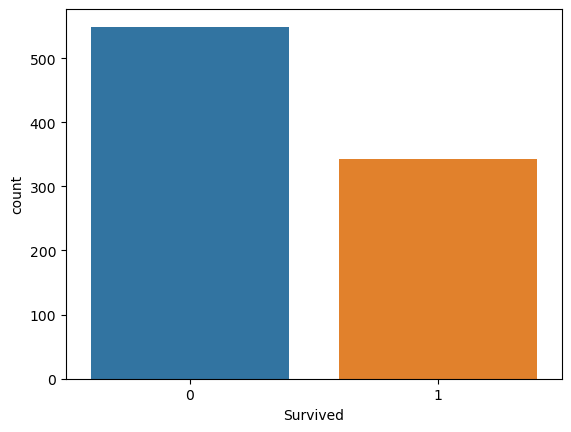

In [68]:

    count_plot('Survived')
   

## Data preprocessing

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket',], axis=1, inplace = True)

In [69]:
#filling missing values
data['Age'].fillna(data['Age'].mean(), inplace = True)
data.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
2           0
3           0
dtype: int64

In [28]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [29]:
# coverting categorical variables into numerical by creating  dummy variables for Sex column.
sex = pd.get_dummies(data['Sex'],drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
# creating Dummy variables for embark column.
embark = pd.get_dummies(data['Embarked'],drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
# Creating dummy for Pclass column
pclass = pd.get_dummies(data['Pclass'],drop_first = True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
data.drop(["Sex","Embarked","Pclass"],axis=1, inplace = True)
data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [37]:
#Concatinating the original data with the dummy one!
data = pd.concat([data,sex,embark,pclass],axis=1)
# Converting the features to string datatype
data.columns = data.columns.astype(str)
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Training the model

In [70]:
# creating the feature variable x by dropping the "survived" column from data.
X = data.drop(['Survived'],axis =1)
# creating the target variable y by assinging the survived column
Y = data['Survived']

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state= 42)

In [71]:
# creating and training the logistic regression model
model = LogisticRegression(max_iter =1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

## Testing accuracy of the model

In [42]:
model.score(X_train,Y_train)

0.812199036918138

In [43]:
model.score(X_test,Y_test)

0.8059701492537313

In [45]:
# using  the model to predict the labels
Y_predicted = model.predict(X_test)
# evaluate the performance of a model by calculating the confusion matrix
confusion_matrix(Y_test, Y_predicted)

array([[137,  20],
       [ 32,  79]], dtype=int64)

## Classification Report

In [46]:
print(classification_report(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.71      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

